# Inicialização do tabuleiro de xadrez com oito rainhas usando uma representação de tabuleiro baseada em índice de linha.
### Esta representação coloca o valor de cada rainha em um número inteiro de 0-7, indicando sua posição na linha específica.

In [113]:
%pip install deap
import random
import numpy as np
from deap import algorithms, base, creator, tools

# A classe FitnessMin é usada quando o objetivo é minimizar a função de aptidão, usada para definir a função de aptidão para um problema de otimização
# O parâmetro weights é uma tupla que define os pesos para cada objetivo da função de aptidão.
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# O atributo fitness é um objeto da classe FitnessMin que representa a aptidão do indivíduo.
creator.create("Individual", list, fitness=creator.FitnessMin)


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Furuya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [114]:
board_size = 20 # Único valor que deve ser alterado para o teste

# Criando e registrando funções na toolbox.
toolbox = base.Toolbox()

# O attr_int é uma função que retorna um número inteiro aleatório entre 0 e o tamanho do tabuleiro - 1 (por começar apartir do zero).
toolbox.register("attr_int", random.randint, 0, board_size - 1)

# O individual é uma função que cria um indivíduo para um algoritmo genético.
# O método initRepeat é usado para criar uma lista de tamanho n com valores gerados pela função attr_int.
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_int, board_size)

# O método toolbox.individual() é usado para criar um indivíduo com valores gerados pela função individual.
toolbox.individual()

[0, 13, 6, 14, 9, 10, 15, 3, 15, 14, 7, 10, 17, 4, 12, 12, 11, 16, 4, 19]

In [115]:
# Função recebe um argumento board, que é uma lista de n elementos e é usada para exibir a representação do tabuleiro baseada no índice de linhas.
def show_grid(board):

    n = np.zeros(board_size**2)

    print((board_size*2+1)*"-")
    for i in range(len(board)):
        n[board[i] + i*board_size] = 1


    for i in range(board_size):
        print("|", end='')
        for j in range(board_size**2):
            if j // board_size == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print((board_size*2+1)*"-")


In [116]:
# Registrando e exibindo uma geração de rainhas.
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# É usado para criar uma lista de 5 indivíduos para exemplificar.
pop = toolbox.population(n=5)

# Printa o primeiro elemento da lista e chama a função para mostrar o tabuleiro
print(pop[0])
show_grid(pop[0])

[4, 4, 17, 3, 9, 9, 2, 9, 14, 19, 2, 16, 18, 12, 6, 2, 9, 8, 19, 4]
-----------------------------------------
|-|-|-|-|X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
-----------------------------------------
|-|-|-|-|X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
-----------------------------------------
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|X|-|-|
-----------------------------------------
|-|-|-|X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
-----------------------------------------
|-|-|-|-|-|-|-|-|-|X|-|-|-|-|-|-|-|-|-|-|
-----------------------------------------
|-|-|-|-|-|-|-|-|-|X|-|-|-|-|-|-|-|-|-|-|
-----------------------------------------
|-|-|X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
-----------------------------------------
|-|-|-|-|-|-|-|-|-|X|-|-|-|-|-|-|-|-|-|-|
-----------------------------------------
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|X|-|-|-|-|-|
-----------------------------------------
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|X|
-----------------------------------------
|-|-|X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
--------

## Avaliação Fitness do tabuleiro
### Esta função determina se as rainhas em uma representação de tabuleiro baseada em índice de linha são válidas como uma solução para o problema das n-rainhas, analisando o espaçamento das posições das rainhas. Posições duplicadas de rainhas são subsequentemente tratadas.


In [117]:
''' Função fitness que calcula soma do número de conflitos horizontais, verticais e diagonais de conflitos
    que ocorrem entre as rainhas posicionadas no tabuleiro. '''
def evaFitness(individual):
    size = len(individual)
    conflicts = 0
    for i in range(size):
        for m in range(i+1, size):
            # Se a posição i e a posição m contêm a mesma rainha.
            if individual[i] == individual[m] and i != m:
                conflicts += 1

    # Verifica cada uma das diagonais
    for t in range(size):
        for n in range(t+1, size):
            # Determina a diagonal direita verificando o espaçamento entre os dois pontos
            if(individual[n] == (individual[t]+(n-t))):
                conflicts += 1
            # Determine a diagonal esquerda verificando o espaçamento entre os dois pontos
            elif(individual[n] == (individual[t]-(n-t))):
                conflicts += 1
    return (conflicts,)


In [118]:
# Registra a função de aptidão, cruzamento, mutação e seleção

# Registrando a função evaFitness como a função de avaliação para o problema das N-Rainhas.
toolbox.register("evaluate", evaFitness)

# Registrando a função cxTwoPoint do módulo tools como a função de cruzamento para o algoritmo genético.
# O tools.cxTwoPoint cruzamento de dois pontos nos indivíduos de entrada da sequência.
toolbox.register("mate", tools.cxTwoPoint)

# tools.mutUniformInt = Muta um indivíduo substituindo seus atributos, por um número inteiro uniformemente escolhido entre low e up.
# low = O menor valor possível para um gene.
# up = O maior valor possível para um gene.
# indpb = A probabilidade de mutação para cada gene.
toolbox.register("mutate", tools.mutUniformInt, low = 0, up = board_size, indpb=0.2)

# Seleciona o melhor indivíduo entre o tamanho do torneio indivíduos escolhidos aleatoriamente
# tournsize = O número de indivíduos que participam de cada torneio.
toolbox.register("select", tools.selTournament, tournsize=3)

In [119]:
# Extrai os valores de aptidão de cada indivíduo.
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

# Também registra as estatisticas de média e o mínimo dos valores de aptidão.
stats.register("avg", np.mean)
stats.register("min", np.min)

In [120]:
# Criando a primeira geração, o hall da fama e executando o algoritmo genético eaSimple por N gerações.

# Cria o Hall da fama apenas para um unico indivíduo
hof = tools.HallOfFame(1)

# Cria uma população inicial de indivíduos baseada no tamanho do tabuleiro, multiplicada por 5, para que esteja parametrizada com o valor de n.
pop = toolbox.population(n=board_size*5)

''' Chama o algoritmo generico com os seguintes parâmetros:
    pop = A população
    toolbox = Variavel que recebeu o base.Toolbox()
    cxpb = A probabilidade de crossover
    mutpb = A probabilidade de mutação.
    ngen = O número de gerações a serem executadas.
    halloffame = Passando a variavel que contém o hall da fama
    stats = O objeto que é usado para armazenar as estatísticas da evolução
    verbose = Boolean se deve imprimir informações durante a execução
'''
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.5 ,ngen=board_size*50, halloffame=hof, stats = stats, verbose = True)

gen	nevals	avg  	min
0  	100   	21.55	13 
1  	62    	18.86	11 
2  	71    	17.82	10 
3  	75    	16.88	10 
4  	75    	16.02	9  
5  	74    	15.62	8  
6  	80    	15.21	8  
7  	66    	14.83	9  
8  	74    	14.27	7  
9  	71    	14.66	7  
10 	77    	14.01	7  
11 	72    	13.59	7  
12 	74    	13.65	6  
13 	61    	12.19	6  
14 	77    	12.09	6  
15 	80    	12.71	7  
16 	78    	12.76	7  
17 	84    	12.48	6  
18 	80    	12.64	6  
19 	64    	11.6 	6  
20 	80    	11.44	6  
21 	69    	12.18	6  
22 	79    	11.82	6  
23 	72    	10.92	7  
24 	70    	11.49	7  
25 	81    	11.27	7  
26 	74    	11.25	7  
27 	71    	10.85	7  
28 	75    	10.17	6  
29 	70    	10.07	6  
30 	82    	9.91 	5  
31 	70    	9.79 	5  
32 	74    	9.85 	5  
33 	84    	9.66 	5  
34 	79    	9.11 	5  
35 	73    	9.5  	5  
36 	79    	9.44 	4  
37 	66    	8.79 	4  
38 	73    	8.3  	4  
39 	81    	9.26 	4  
40 	76    	8.85 	4  
41 	76    	8.97 	4  
42 	72    	8.65 	4  
43 	75    	8.59 	4  
44 	70    	8.19 	4  
45 	74    	7.99 	4  
46 	76    	7.

## Plotando a média e o mínimo de cada geração usando um gráfico de linhas.

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Furuya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


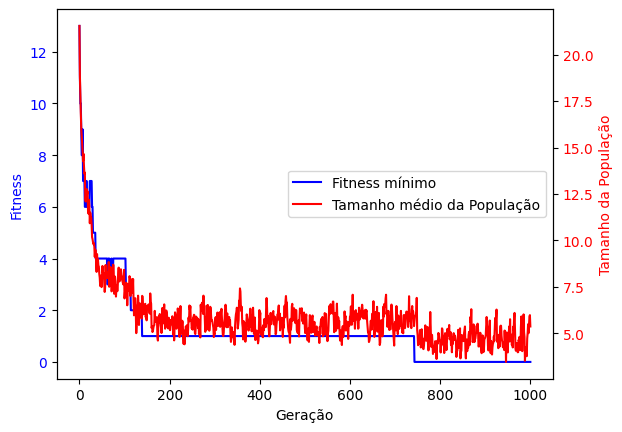

In [121]:
# Importa a biblioteca matplotlib.pyplot
%pip install matplotlib 
import matplotlib.pyplot as plt

# Define %matplotlib inline para que o gráfico seja exibido no notebook.
%matplotlib inline

# Gen contém o número de gerações
gen = logbook.select("gen")

# Contém o valor mínimo de aptidão para cada geração
fit_mins = logbook.select("min")

# Contém o tamanho médio da população para cada geração
size_avgs = logbook.select("avg")

# Cria uma figura e um conjunto de subplots
fig, ax1 = plt.subplots()

# Cria uma linha azul sólida no gráfico
line1 = ax1.plot(gen, fit_mins, "b-", label="Fitness mínimo")

# Nome do rótulo do eixo x
ax1.set_xlabel("Geração")

# Nome do rótulo do eixo y com a cor azul
ax1.set_ylabel("Fitness", color="b")

# No eixo y define a cor dos rótulos e valores como azul.
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Tamanho médio da População")
ax2.set_ylabel("Tamanho da População", color="r")

# No eixo x a esquerda do grafico define a cor dos rótulos e valores como vermelho.
for tl in ax2.get_yticklabels():
    tl.set_color("r")

# Cria uma lista com as duas linhas criadas anteriormente
lns = line1 + line2

# Cria uma lista com os rótulos das duas linhas criadas anteriormente
labs = [l.get_label() for l in lns]

# Cria a legenda do grafico e centraliza ela a direita e centro
ax1.legend(lns, labs, loc="center right")

#Plota o gráfico
plt.show()

### Apresentando o melhor tabuleiro de xadrez individual e seu valor de adequação.



In [122]:
# Printa o primeiro elemento do hall da fama e chama a função para gerar o tabuleiro
print("Melhor tabuleiro individual: ", hof[0])
show_grid(hof[0])


Melhor tabuleiro individual:  [13, 7, 20, 12, 16, 2, 11, 5, 3, 1, 18, 14, 6, 17, 10, 8, 15, 4, 9, 0]
-----------------------------------------
|-|-|-|-|-|-|-|-|-|-|-|-|-|X|-|-|-|-|-|-|
-----------------------------------------
|-|-|-|-|-|-|-|X|-|-|-|-|-|-|-|-|-|-|-|-|
-----------------------------------------
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
-----------------------------------------
|X|-|-|-|-|-|-|-|-|-|-|-|X|-|-|-|-|-|-|-|
-----------------------------------------
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|X|-|-|-|
-----------------------------------------
|-|-|X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
-----------------------------------------
|-|-|-|-|-|-|-|-|-|-|-|X|-|-|-|-|-|-|-|-|
-----------------------------------------
|-|-|-|-|-|X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
-----------------------------------------
|-|-|-|X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
-----------------------------------------
|-|X|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
-----------------------------------------
|-|-|-|-|-|-|-|-|